# **---SETUP---**

[WiDS Datathon++ 2025 University Challenge](https://colab.research.google.com/drive/1KEwnJ7pGD4HqnZ3pd2SG8BYtRhJCS8YI?usp=sharing#scrollTo=9n9_cTveKmse)

## **MOUNT GOOGLE DRIVE**

---

*   Access this link: https://drive.google.com/file/d/1c0yJe3tGA9rYWd3uyfcDSl3c_p0A8rC3/view

*   Make a shortcut to your Google Drive account

*   Run de following cell:


In [170]:
from google.colab import drive
drive.mount('/content/drive/') # be aware to select same account as in previous steps

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


## UNZIP DATASET

In [171]:
!unzip -n -q /content/drive/MyDrive/widsdatathon2025-university.zip -d /content/drive/MyDrive/widsdatathon2025-university

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## INFINITE SESION

Copy that code:

```
function ClickConnect()
{
  console.log("Working");
  document.querySelector("#top-toolbar > colab-connect-button").shadowRoot.querySelector("#connect").click();
}

# to start refreshing call
let intervalID = setInterval(ClickConnect,60000)

# to stop refreshing call
clearInterval(intervalID);
```

Open Console from Inspect Elements


Paste and run that code

All done now :))

"*Google Colab notebooks have an idle timeout of 90 minutes and absolute timeout of 12 hours. This means, if user does not interact with his Google Colab notebook for more than 90 minutes, its instance is automatically terminated. Also, maximum lifetime of a Colab instance is 12 hours.*"


## **FOLDER STRUCTURE**

In [172]:
!pip install directory-tree

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [173]:
from directory_tree import DisplayTree

customPath: str = '/content/drive/Shared drives/widsdatathon2025-university/'
stringRepresentation: str = DisplayTree(customPath, stringRep=True, showHidden=True, maxDepth=2)
print(stringRepresentation)

widsdatathon2025-university/
├── checkpoints/
│   ├── elastic_net_checkpoint_v5.0.json
│   └── elastic_net_checkpoint_v5.json
├── FML project | Documentation.gdoc
├── FML project | Presentation.gslides
├── metadata/
│   ├── test_metadata.csv
│   └── training_metadata.csv
├── results/
│   ├── best_prediction_lasso_regression_k-splits_11_age_rounded_2digits.csv
│   ├── best_predictions.csv
│   ├── combined_predictions.csv
│   ├── combined_predictions_v2.csv
│   ├── combined_predictions_v3.csv
│   ├── Copy of best_predictions.csv
│   ├── Investigatie_tipuri_de_regresii.xlsx
│   ├── last_predictions.csv
│   ├── predictions_bayesian.csv
│   ├── predictions_decision_tree.csv
│   ├── predictions_elastic_net_combined.csv
│   ├── predictions_elastic_net_origin_female_gridsearch.csv
│   ├── predictions_elastic_net_origin_k5_V6_pure.csv
│   ├── predictions_elastic_net_origin_k5_V6_pure2.csv
│   ├── predictions_elastic_net_origin_male_gridsearch.csv
│   ├── predictions_elastic_net_random_search_cv

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# **---DEPENDECIES---**

## LIBRARIES

In [174]:
!pip install ipdb directory-tree xgboost seaborn scikit-learn lightgbm tqdm fancyimpute

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [175]:
import os
import re
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sklearn
import glob
import joblib
import xgboost as xgb
from tqdm import tqdm
import logging
import json
from fancyimpute import KNN

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [176]:
from sklearn.svm import SVC, SVR
from sklearn.metrics import balanced_accuracy_score, roc_auc_score, accuracy_score, confusion_matrix, roc_curve
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, BayesianRidge
from sklearn.model_selection import KFold, StratifiedKFold, RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeRegressor
from sklearn.base import BaseEstimator, RegressorMixin
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectKBest, f_regression
from scipy.io import loadmat
from scipy.stats import zscore, pearsonr, uniform

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## GLOBAL PATHS

In [177]:
PATH_TO_TRAININIG_DATA = '/content/drive/Shared drives/widsdatathon2025-university/train_tsv/train_tsv/'
PATH_TO_TEST_DATA = '/content/drive/Shared drives/widsdatathon2025-university/test_tsv/test_tsv/'
PATH_TO_METADATA = '/content/drive/Shared drives/widsdatathon2025-university/metadata/'
PATH_TO_RESULTS = '/content/drive/Shared drives/widsdatathon2025-university/results/'
PATH_TO_CHECKPOINTS = '/content/drive/Shared drives/widsdatathon2025-university/checkpoints/'

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [178]:
# Define logger
logger = logging.getLogger(__name__)  # Get a logger instance
logger.setLevel(logging.INFO)  # Set the logging level

# Create a handler for writing log messages to the console
handler = logging.StreamHandler()
formatter = logging.Formatter('%(asctime)s - %(name)s - %(levelname)s - %(message)s')
handler.setFormatter(formatter)
logger.addHandler(handler)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# **---DATA EXPLORER---**

## DATA ANALYZER

In [179]:
# Load both metadata files
train_meta = pd.read_csv(PATH_TO_METADATA + 'training_metadata.csv')
test_meta = pd.read_csv(PATH_TO_METADATA + 'test_metadata.csv')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [180]:
# Dataset Overview
print("Dataset Overview:")
print(f"Training samples: {len(train_meta)}")
print(f"Test samples: {len(test_meta)}")

Dataset Overview:
Training samples: 1104
Test samples: 474


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [181]:
# Verify no missing values remain
print("Missing values in training set after imputation:")
print(train_meta.isnull().sum())
print("\nMissing values in test set after imputation:")
print(test_meta.isnull().sum())

Missing values in training set after imputation:
participant_id          0
age                     0
sex                     0
study_site              0
bmi                    18
ethnicity             109
race                  168
handedness              0
parent_1_education    183
parent_2_education     22
p_factor_fs             0
internalizing_fs        0
externalizing_fs        0
attention_fs            0
dtype: int64

Missing values in test set after imputation:
participant_id         0
sex                    0
study_site             0
bmi                    9
ethnicity             55
race                  72
handedness             0
parent_1_education    84
parent_2_education    10
p_factor_fs            0
internalizing_fs       0
externalizing_fs       0
attention_fs           0
dtype: int64


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Connectivity Matrix

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Dataset Overview:
Training samples: 1104
Test samples: 474


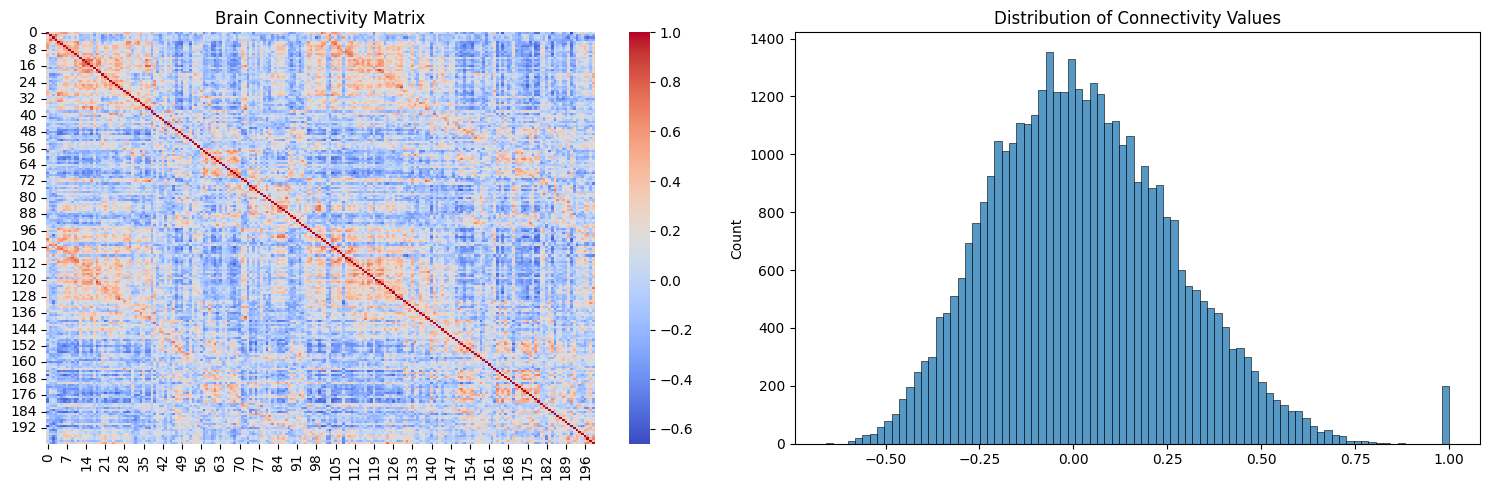


Connectivity Matrix Shape: (200, 200)


In [182]:
def analyze_data_overview(train_meta, test_meta, train_path):
   print("Dataset Overview:")
   print(f"Training samples: {len(train_meta)}")
   print(f"Test samples: {len(test_meta)}")

   # Visualize one connectivity matrix
   sample_file = glob.glob(f"{train_path}/sub-*.tsv")[0]
   matrix = pd.read_csv(sample_file, sep='\t', header=None)

   plt.figure(figsize=(15, 5))
   plt.subplot(121)
   sns.heatmap(matrix, cmap='coolwarm')
   plt.title("Brain Connectivity Matrix")

   plt.subplot(122)
   sns.histplot(matrix.values.flatten())
   plt.title("Distribution of Connectivity Values")
   plt.tight_layout()
   plt.show()

   return matrix.shape

matrix_shape = analyze_data_overview(train_meta, test_meta, PATH_TO_TRAININIG_DATA)
print(f"\nConnectivity Matrix Shape: {matrix_shape}")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## **DATA MISSING RATIO**

Info function

In [183]:
def create_info_df(df):
   info_dict = {
       'Type  ': df.dtypes,
       'Missing Values': df.isnull().sum(),
       'Missing %': (df.isnull().sum() / len(df) * 100).round(3),
       'Unique Values': df.nunique()
   }
   return pd.DataFrame(info_dict)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [184]:
print("TRAINING SET:")
print(f"Samples: {len(train_meta)}")
display(create_info_df(train_meta))

TRAINING SET:
Samples: 1104


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Type,Missing Values,Missing %,Unique Values
participant_id,object,0,0.000,1104
age,float64,0,0.000,684
sex,object,0,0.000,2
study_site,object,0,0.000,4
bmi,float64,18,1.630,743
ethnicity,object,109,9.873,2
race,object,168,15.217,4
handedness,object,0,0.000,3
parent_1_education,object,183,16.576,4
parent_2_education,object,22,1.993,4


In [185]:
print("\nTEST SET:")
print(f"Samples: {len(test_meta)}")
display(create_info_df(test_meta))


TEST SET:

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



Samples: 474


,Type,Missing Values,Missing %,Unique Values
participant_id,object,0,0.000,474
sex,object,0,0.000,2
study_site,object,0,0.000,4
bmi,float64,9,1.899,393
ethnicity,object,55,11.603,2
race,object,72,15.190,4
handedness,object,0,0.000,3
parent_1_education,object,84,17.722,4
parent_2_education,object,10,2.110,4
p_factor_fs,float64,0,0.000,244


## **VIEW DATASET ISSUES**

In [186]:
def analyze_gender(df, set_name):
  total = len(df)
  if 'sex' in df.columns: # Check if 'sex' column exists
    female_count = len(df[df['sex'] == 'Female'])
    male_count = len(df[df['sex'] == 'Male'])

    female_percentage = (female_count / total) * 100
    male_percentage = (male_count / total) * 100
    print(f"{set_name} Set:")
    print(f"  Total samples: {total}")
    print(f"  Female: {female_count} ({female_percentage:.2f}%)")
    print(f"  Male: {male_count} ({male_percentage:.2f}%)")
  else:
    print(f"Warning: 'sex' column not found in {set_name} dataset.")

analyze_gender(train_meta, "Training")
analyze_gender(test_meta, "Testing")

Training Set:
  Total samples: 1104
  Female: 416 (37.68%)
  Male: 688 (62.32%)
Testing Set:
  Total samples: 474
  Female: 179 (37.76%)
  Male: 295 (62.24%)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



Training Set Age Analysis:
  Age Range: 5.05 - 21.9
  Age Standard Deviation: 3.2349357347187166
  Age Median: 10.585
  Age 25th Percentile: 8.655000000000001
  Age 75th Percentile: 13.5125


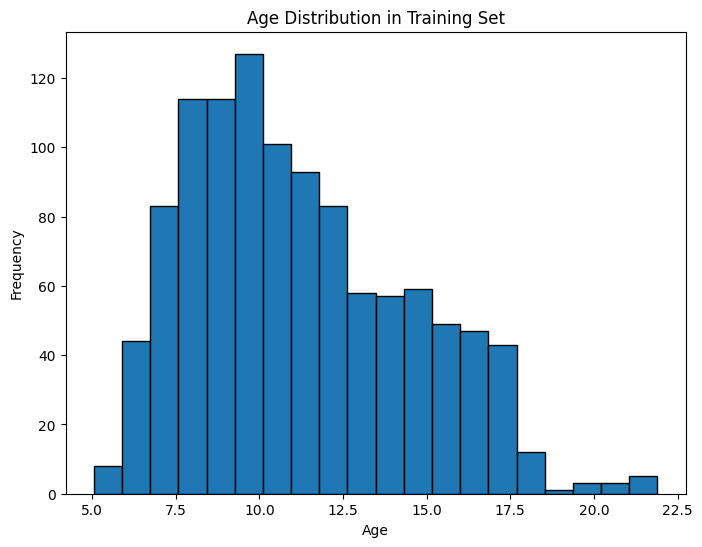

In [187]:
def analyze_age(df, set_name):
    print(f"\n{set_name} Set Age Analysis:")
    if 'age' in df.columns:
        # Age range
        min_age = df['age'].min()
        max_age = df['age'].max()
        print(f"  Age Range: {min_age} - {max_age}")

        # Dispersion (standard deviation)
        age_std = df['age'].std()
        print(f"  Age Standard Deviation: {age_std}")

        # Additional analysis: you can add more descriptive statistics like quartiles, median etc.
        # For example:
        print(f"  Age Median: {df['age'].median()}")
        print(f"  Age 25th Percentile: {df['age'].quantile(0.25)}")
        print(f"  Age 75th Percentile: {df['age'].quantile(0.75)}")

        # Visualization (optional) - Histogram of age distribution
        plt.figure(figsize=(8, 6))
        plt.hist(df['age'], bins=20, edgecolor='black')  # Adjust bins as needed
        plt.xlabel("Age")
        plt.ylabel("Frequency")
        plt.title(f"Age Distribution in {set_name} Set")
        plt.show()

    else:
        print(f"  Warning: 'age' column not found in {set_name} dataset.")

analyze_age(train_meta, "Training")

## **DATA PROCESSING**

### Functions declaration

In [188]:
long_rows = []
all_headers = []

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [189]:
def ensure_is_dataframe(matrix: np.ndarray | pd.DataFrame):
    if isinstance(matrix, np.ndarray):
        return pd.DataFrame(matrix)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [190]:
def convert_matrix_to_long_row(matrix):
    """
        Converts the square matrix into a long row of unique correlations
        Returns None if conversion fails
    """
    try:
        # Ensure it's a DataFrame and contains valid numerical data
        if isinstance(matrix, np.ndarray):
            matrix = pd.DataFrame(matrix)

        if not isinstance(matrix, pd.DataFrame):
            return None

        # Get upper triangle (excluding diagonal)
        mask = np.triu(np.ones(matrix.shape), k=1).astype(bool)
        upper_triangle = matrix.where(mask)

        # Convert to row format
        correlations = upper_triangle.values[mask]
        return pd.DataFrame(correlations).T

    except Exception as e:
        print(f"Error in convert_matrix_to_long_row: {str(e)}")
        return None

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [191]:
def generate_column_headers(matrix):
    """
        Creates column headers for brain region connectivity matrix
    """
    rows, cols = matrix.shape
    return [f'region_{i}_to_{j}' for i in range(rows) for j in range(cols) if i < j]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [192]:
def process_folder(source_folder, output_file):
    """
    Process TSV files in a folder and combine them into a single output file.

    Args:
        source_folder (str): Path to folder containing TSV files
        output_file (str): Path for output file

    Returns:
        pd.DataFrame: Combined data from all processed files
        dict: Processing statistics
    """
    if not os.path.exists(source_folder):
        raise ValueError(f"Source folder does not exist: {source_folder}")

    stats = {
        "processed": 0,
        "errors": 0,
        "skipped": 0
    }

    long_rows = []
    total_files = len([f for f in os.listdir(source_folder) if f.endswith('.tsv')])

    # Use tqdm for progress tracking if available
    try:
        from tqdm import tqdm
        files_iter = tqdm(os.listdir(source_folder))
    except ImportError:
        files_iter = os.listdir(source_folder)

    for filename in files_iter:
        if not filename.endswith('.tsv'):
            stats["skipped"] += 1
            continue

        try:
            file_path = os.path.join(source_folder, filename)
            if not os.path.isfile(file_path):
                stats["skipped"] += 1
                continue

            # Extract participant ID
            id_match = re.search(r".{4}(.{12})_", filename)
            if not id_match:
                logger.warning(f"Could not extract participant ID from {filename}")
                stats["errors"] += 1
                continue

            participant_id = id_match.group(1)

            # Read and validate matrix
            matrix = pd.read_csv(file_path, sep='\t', header=None)

            # Validation checks
            if matrix.empty or matrix.isnull().values.any():
                logger.warning(f"Invalid data in {filename}: empty or contains NaN values")
                stats["errors"] += 1
                continue

            if not matrix.shape[0] == matrix.shape[1]:
                logger.warning(f"Invalid matrix shape in {filename}: not square")
                stats["errors"] += 1
                continue

            # Convert to correlation row
            long_row = convert_matrix_to_long_row(matrix)
            if long_row is None or long_row.empty:
                logger.warning(f"Failed to convert matrix for {filename}")
                stats["errors"] += 1
                continue

            # Add participant ID and append
            long_row.insert(0, "participant_id", participant_id)
            long_rows.append(long_row)
            stats["processed"] += 1

        except Exception as e:
            logger.error(f"Error processing {filename}: {str(e)}")
            stats["errors"] += 1
            continue

    if not long_rows:
        raise ValueError("No valid data was processed!")

    # Combine all processed data
    out_df = pd.concat(long_rows, ignore_index=True)
    headers = ['participant_id'] + generate_column_headers(matrix)
    out_df.columns = headers

    # Save to file
    out_df.to_csv(output_file, sep='\t', index=False)

    # Log statistics
    logger.info(f"""
    Processing complete:
    Files processed: {stats['processed']}
    Errors: {stats['errors']}
    Skipped: {stats['skipped']}
    Success rate: {(stats['processed']/total_files)*100:.2f}%
    """)

    return out_df, stats

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### Processing files

In [194]:
# unzipped from folder
source_folder_test = PATH_TO_TEST_DATA
output_file_test = PATH_TO_TEST_DATA + 'test_correlations.tsv'

source_folder_train = PATH_TO_TRAININIG_DATA
output_file_train = PATH_TO_TRAININIG_DATA + 'train_correlations.tsv'

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [195]:
# calling process folder function for test data
if  os.path.exists(output_file_test):
    test_big = pd.read_csv(output_file_test, sep='\t')
    print("Test correlations loaded successfully.")
else:
    test_big, stats = process_folder(source_folder_test, output_file_test)
    print("Test correlations processed successfully.")
    print(stats)

# should be: 474 rows
print("# rows, test: ", len(test_big))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Test correlations loaded successfully.
# rows, test:  474


In [196]:
# calling process folder for train data
if  os.path.exists(output_file_train):
    train_big = pd.read_csv(output_file_train, sep='\t')
    print("Train correlations loaded successfully.")
else:
    train_big, stats = process_folder(source_folder_train, output_file_train)
    print("Train correlations processed successfully.")
    print(stats)

# should be: 1104 rows
print("# rows, train: ", len(train_big))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Train correlations loaded successfully.
# rows, train:  1104


### Imput metadata

In [197]:
def knn_impute_categorical(df, categorical_cols, k=25):
    # Facem o copie a DataFrame-ului pentru a nu modifica originalul
    df_imputed = df.copy()

    # One-Hot Encoding pentru coloanele categorice
    df_encoded = pd.get_dummies(df_imputed[categorical_cols], dummy_na=True)

    # Aplică KNN pentru imputare
    df_imputed_values = KNN(k=k).fit_transform(df_encoded)

    # Transformă rezultatul înapoi într-un DataFrame
    df_imputed_values = pd.DataFrame(df_imputed_values, columns=df_encoded.columns)

    # Decodifică coloanele categorice
    for col in categorical_cols:
        # Extrage coloanele codificate pentru coloana curentă
        cols = [c for c in df_imputed_values.columns if c.startswith(col)]
        # Găsește indexul valorii maxime (adică categoria prezisă)
        df_imputed[col] = df_imputed_values[cols].idxmax(axis=1).str.replace(f"{col}_", "")

    return df_imputed

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [198]:
# remove unrelated data
train_meta = train_meta.drop(columns=['parent_1_education', 'parent_2_education'])
test_meta = test_meta.drop(columns=['parent_1_education', 'parent_2_education'])

# remove individs without BMI
train_meta = train_meta.dropna(subset=['bmi'])
#test_meta = test_meta.dropna(subset=['bmi'])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [199]:
useKNN_Imputation = False

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [200]:
categorical_cols = ['ethnicity', 'race']

if False:
  # Fill missing categorical values with KNN
  train_meta = knn_impute_categorical(train_meta, categorical_cols, k=50)
  test_meta = knn_impute_categorical(test_meta, categorical_cols, k=50)
else:
  # Fill missing categorical values with 'Unknown'
  train_meta[categorical_cols] = train_meta[categorical_cols].fillna('Unknown')
  test_meta[categorical_cols] = test_meta[categorical_cols].fillna('Unknown')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [201]:
def knn_impute_numerical(df, numerical_cols, k=5):
    # Facem o copie a DataFrame-ului pentru a nu modifica originalul
    df_imputed = df.copy()

    # Aplică KNN pentru imputare
    df_imputed[numerical_cols] = KNN(k=k).fit_transform(df_imputed[numerical_cols])

    return df_imputed

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [202]:
numerical_cols = ['bmi', 'p_factor_fs', 'internalizing_fs', 'externalizing_fs', 'attention_fs']

if True:
  # Fill missing numerical values with the KNN
  train_meta = knn_impute_numerical(train_meta, numerical_cols, k=50)
  test_meta = knn_impute_numerical(test_meta, numerical_cols, k=50)
else:
  # Fill missing numerical values with the mean
  train_meta[numerical_cols] = train_meta[numerical_cols].fillna(train_meta[numerical_cols].mean())
  test_meta[numerical_cols] = test_meta[numerical_cols].fillna(test_meta[numerical_cols].mean())

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/fancyimpute/solver.py:55: UserWarning: Input matrix is not missing any values
  warnings.warn("Input matrix is not missing any values")
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: Futur

Imputing row 1/1086 with 0 missing, elapsed time: 1.133
Imputing row 101/1086 with 0 missing, elapsed time: 1.143
Imputing row 201/1086 with 0 missing, elapsed time: 1.148
Imputing row 301/1086 with 0 missing, elapsed time: 1.155
Imputing row 401/1086 with 0 missing, elapsed time: 1.162
Imputing row 501/1086 with 0 missing, elapsed time: 1.163
Imputing row 601/1086 with 0 missing, elapsed time: 1.170
Imputing row 701/1086 with 0 missing, elapsed time: 1.176
Imputing row 801/1086 with 0 missing, elapsed time: 1.183
Imputing row 901/1086 with 0 missing, elapsed time: 1.190
Imputing row 1001/1086 with 0 missing, elapsed time: 1.197


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Imputing row 1/474 with 0 missing, elapsed time: 0.229
Imputing row 101/474 with 0 missing, elapsed time: 0.243
Imputing row 201/474 with 0 missing, elapsed time: 0.245
Imputing row 301/474 with 0 missing, elapsed time: 0.246
Imputing row 401/474 with 0 missing, elapsed time: 0.253


In [203]:
print("Missing values in training set after imputation:")
print(train_meta.isnull().sum())

Missing values in training set after imputation:
participant_id      0
age                 0
sex                 0
study_site          0
bmi                 0
ethnicity           0
race                0
handedness          0
p_factor_fs         0
internalizing_fs    0
externalizing_fs    0
attention_fs        0
dtype: int64


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [204]:
print("\nMissing values in test set after imputation:")
print(test_meta.isnull().sum())


Missing values in test set after imputation:
participant_id      0
sex                 0
study_site          0
bmi                 0
ethnicity           0
race                0
handedness          0
p_factor_fs         0
internalizing_fs    0
externalizing_fs    0
attention_fs        0
dtype: int64


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### Outliers

In [205]:
def eliminate_noise_from_outliers(df, percentile=95):
    df_no_outliers = df.copy()
    for col in df.columns:
        if pd.api.types.is_numeric_dtype(df[col]):
            upper_limit = df[col].quantile(percentile / 100)
            df_no_outliers[col] = np.where(df_no_outliers[col] > upper_limit, upper_limit, df_no_outliers[col])
    return df_no_outliers

# Apply outlier elimination to train_big and test_big
useOutliersElimination = True
if useOutliersElimination:
    print(f"Original train_big shape: {train_big.shape}")
    print(f"Original test_big shape: {test_big.shape}")
    train_big = eliminate_noise_from_outliers(train_big)
    test_big = eliminate_noise_from_outliers(test_big)
print(f"train_big shape: {train_big.shape}")
print(f"test_big shape: {test_big.shape}")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Original train_big shape: (1104, 19901)
Original test_big shape: (474, 19901)
train_big shape: (1104, 19901)
test_big shape: (474, 19901)


### Merge data

In [206]:
assert train_big.shape[1] == test_big.shape[1]
assert train_meta.shape[1] == test_meta.shape[1] + 1

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [207]:
# Merge the datasets based on the participant ID
train = pd.merge(train_big, train_meta , on='participant_id', how='inner')
test = pd.merge(test_big, test_meta, on='participant_id', how='inner')

# Print the shapes of the combined datasets to verify the merge
print("Shape of combined training data:", train.shape)
print("Shape of combined test data:", test.shape)


# Display the first few rows of the combined datasets
print("\nCombined Training Data:")
display(train.head())

print("\nCombined Test Data:")
display(test.head())

assert train.shape[1] == test.shape[1] + 1, "X_test and X_train must have the same number of columns"


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Shape of combined training data: (1084, 19912)
Shape of combined test data: (474, 19911)

Combined Training Data:


,participant_id,region_0_to_1,region_0_to_2,region_0_to_3,region_0_to_4,region_0_to_5,region_0_to_6,region_0_to_7,region_0_to_8,region_0_to_9,...,sex,study_site,bmi,ethnicity,race,handedness,p_factor_fs,internalizing_fs,externalizing_fs,attention_fs
0,NDARCJ330NBP,0.141125,0.821869,0.771829,0.257024,0.620000,0.584512,0.498643,0.085761,0.323027,...,Male,HBNsiteRU,14.71,Not_Hispanic_or_Latino,White,Right,0.43,-0.24,-1.18,-0.60
1,NDARCJ363KLE,-0.011996,0.829316,0.514578,0.750132,0.756697,0.792447,0.572704,0.465895,0.651037,...,Female,HBNsiteRU,25.19,Unknown,Unknown,Right,0.70,1.65,-0.50,-0.13
2,NDARCM302VJ1,-0.235806,0.244939,0.533121,0.689784,0.777922,0.638855,0.388088,0.197532,0.222258,...,Female,HBNsiteRU,18.34,Hispanic_or_Latino,Unknown,Right,0.86,0.16,-0.63,1.35
3,NDARCB627KDN,0.099504,0.654781,0.559540,0.717461,0.785136,0.717686,0.653566,0.474366,0.596832,...,Male,HBNsiteRU,24.08,Not_Hispanic_or_Latino,White,Right,-0.74,1.54,0.28,-0.89
4,NDARCL016NHB,0.131607,0.680176,0.375307,0.624480,0.765170,0.707003,0.601565,0.285174,0.580267,...,Female,HBNsiteRU,18.10,Not_Hispanic_or_Latino,White,Right,0.00,1.27,-1.13,-0.32



Combined Test Data:


,participant_id,region_0_to_1,region_0_to_2,region_0_to_3,region_0_to_4,region_0_to_5,region_0_to_6,region_0_to_7,region_0_to_8,region_0_to_9,...,sex,study_site,bmi,ethnicity,race,handedness,p_factor_fs,internalizing_fs,externalizing_fs,attention_fs
0,NDARAH304ED7,0.183763,0.450725,0.518470,0.796098,0.804159,0.785018,0.571066,0.356863,0.602670,...,Female,HBNsiteRU,12.33,Not_Hispanic_or_Latino,White,Right,-0.90,0.25,-0.61,-0.13
1,NDARAA075AMK,0.524855,0.484972,0.492336,0.517045,0.468494,0.553764,0.555734,0.300393,0.395799,...,Female,HBNsiteSI,14.86,Unknown,Unknown,Right,-1.61,-0.74,-0.31,-0.43
2,NDARAF535XK6,-0.117180,0.579305,0.180526,0.421484,0.795301,0.718218,0.568206,0.489041,0.556834,...,Female,HBNsiteCBIC,18.46,Hispanic_or_Latino,Unknown,Left,0.09,1.26,-1.20,-0.02
3,NDARAL897CYV,0.249719,0.361174,0.127226,0.387736,0.326687,0.664087,0.380053,0.208770,0.370599,...,Male,HBNsiteCUNY,17.96,Not_Hispanic_or_Latino,Black,Right,0.83,-1.53,-0.67,0.52
4,NDARAG340ERT,0.531255,0.773179,0.801774,0.768825,0.867558,0.811291,0.734729,0.527167,0.722575,...,Male,HBNsiteRU,16.36,Unknown,Black,Right,-0.93,-1.03,-0.59,1.86


## PREPARE FEATURES


- `X_train`, `X_test`: Contains all feature columns
- `y_train`, `y_test`: Holds the target column

In [208]:
#Check for NaN in the test dataframe
print("NaN values in test:", pd.isna(train).sum().sum())

#Check for NaN in the train dataframe
print("NaN values in train:", pd.isna(test).sum().sum())

NaN values in test: 0
NaN values in train: 0


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [209]:
train = train.dropna(subset=['age'])
print("Missing values in y_train after dropping rows:", train.isnull().sum())

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Missing values in y_train after dropping rows: participant_id      0
region_0_to_1       0
region_0_to_2       0
region_0_to_3       0
region_0_to_4       0
                   ..
handedness          0
p_factor_fs         0
internalizing_fs    0
externalizing_fs    0
attention_fs        0
Length: 19912, dtype: int64


### Split data into input/output

In [210]:
print("Shape of train:", train.shape)
print("Shape of test:", test.shape)

Shape of train: (1084, 19912)
Shape of test: (474, 19911)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [211]:
"""
    We train the model using the target values in `y_train`, which represents the age predictions. After training, we generate new predictions based on the feature data in `X_test` and `y_test`.
    The predictions can then be compared against the actual target values in `y_train` to evaluate the model's performance.
"""

X_train = train.iloc[:, [i for i in range(train.shape[1]) if i != 0]]
X_train = train.drop(columns=['age'])

X_test = test.iloc[:, [i for i in range(test.shape[1])]]

y_train = train['age']
y_test = test.iloc[:, 0]

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

assert X_test.shape[1] == X_train.shape[1], "X_test_final and X_train_final must have the same number of columns"


Shape of X_train: (1084, 19911)
Shape of X_test: (474, 19911)
Shape of y_train: (1084,)
Shape of y_test: (474,)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### Activate modules

In [212]:
useBalancedSet = True
useNormalizedAges = False

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### Check for missing values

In [213]:
#Check for NaN in the test dataframe
print("NaN values in test:", pd.isna(X_train).sum().sum())

#Check for NaN in the train dataframe
print("NaN values in train:", pd.isna(X_test).sum().sum())

NaN values in test: 0
NaN values in train: 0


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [214]:
#Check for NaN in the test dataframe
nan_counts_test = pd.isna(X_test).sum()
categorical_missing_test = nan_counts_test[X_test.select_dtypes(include=['object']).columns].sum()
numerical_missing_test = nan_counts_test[X_test.select_dtypes(exclude=['object']).columns].sum()
print("Categorical NaN values in test:", categorical_missing_test)
print("Numerical NaN values in test:", numerical_missing_test)


#Check for NaN in the train dataframe
nan_counts_train = pd.isna(X_train).sum()
categorical_missing_train = nan_counts_train[X_train.select_dtypes(include=['object']).columns].sum()
numerical_missing_train = nan_counts_train[X_train.select_dtypes(exclude=['object']).columns].sum()
print("Categorical NaN values in train:", categorical_missing_train)
print("Numerical NaN values in train:", numerical_missing_train)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Categorical NaN values in test: 0
Numerical NaN values in test: 0
Categorical NaN values in train: 0
Numerical NaN values in train: 0


### Handle categorical variables

In [215]:
# Identify categorical columns in X_train
categorical_cols = ['sex', 'study_site', 'ethnicity', 'race', 'handedness'] # , 'parent_1_education', 'parent_2_education'

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### Convert Categorical Columns to Strings

In [216]:
"""
    To ensure there are no mixed data types, we convert all categorical columns to string type. This prevents issues during encoding.
"""

# Convert categorical columns to strings to avoid mixed types
X_train.loc[:, categorical_cols] = X_train.loc[:, categorical_cols].astype(str)
X_test.loc[:, categorical_cols] = X_test.loc[:, categorical_cols].astype(str)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### Balance Women/Men Entities

In [217]:
def balance_dataset(metadata_df, path_to_training_data):

    # Separate male and female samples
    female_df = metadata_df[metadata_df['sex'] == 'Female']
    male_df = metadata_df[metadata_df['sex'] == 'Male']

    # Determine the smaller gender group size
    min_size = min(len(female_df), len(male_df))

    if min_size == 0:
        print("Warning: One of the gender groups is empty. Cannot balance the dataset.")
        return None

    # Sample from both groups to get equal representation
    balanced_female_df = female_df.sample(n=min_size, random_state=42)  # Use random_state for reproducibility
    balanced_male_df = male_df.sample(n=min_size, random_state=42)

    # Concatenate the balanced samples
    balanced_df = pd.concat([balanced_female_df, balanced_male_df])

    # Shuffle the combined dataset
    balanced_df = balanced_df.sample(frac=1, random_state=42).reset_index(drop=True)

    return balanced_df

balanced_train_meta = balance_dataset(train_meta, PATH_TO_TRAININIG_DATA)

if balanced_train_meta is not None:
    print("\nBalanced Training Set:")
    print(f"Samples: {len(balanced_train_meta)}")
    analyze_gender(balanced_train_meta, "Balanced Training")


Balanced Training Set:
Samples: 812
Balanced Training Set:
  Total samples: 812
  Female: 406 (50.00%)
  Male: 406 (50.00%)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [218]:
balanced_train_big = pd.merge(train_big, balanced_train_meta, on='participant_id', how='inner')
print("Shape of balanced_train_big:", balanced_train_big.shape)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Shape of balanced_train_big: (810, 19912)


In [219]:
if useBalancedSet:
    train_big = balanced_train_big
    train_meta = balanced_train_meta
else:
    train_big = train_big
    train_meta = train_meta

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### One-Hot Encoding of Categorical Variables

In [220]:
"""
    We apply one-hot encoding to the categorical columns to convert them into a format suitable for our linear regression model.
    This encoding creates new binary columns for each category, allowing the model to interpret categorical variables correctly.
"""

# Apply One-Hot Encoding to the categorical columns
encoder = OneHotEncoder(drop='first', handle_unknown='ignore')  # drop='first' to avoid multicollinearity

# Fit the encoder on X_train and transform both X_train and X_test
X_train_encoded = encoder.fit_transform(X_train[categorical_cols])
X_test_encoded = encoder.transform(X_test[categorical_cols])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### Convert Encoded Data to DataFrames

In [221]:
# Create final feature matrices
X_train_encoded_df = pd.DataFrame(X_train_encoded.todense(), columns=encoder.get_feature_names_out(categorical_cols))
X_test_encoded_df = pd.DataFrame(X_test_encoded.todense(), columns=encoder.get_feature_names_out(categorical_cols))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### Combine Encoded and Numerical Columns

In [222]:
"""
    Now, we will drop the original categorical columns from our feature sets and combine the encoded categorical columns with the remaining numerical columns.
"""

# Drop original categorical columns from X_train and X_test
X_train_numerical = X_train.drop(categorical_cols, axis=1).reset_index(drop=True)
X_test_numerical = X_test.drop(categorical_cols, axis=1).reset_index(drop=True)

# Combine the encoded categorical columns with the numerical columns
X_train_final = pd.concat([X_train_encoded_df, X_train_numerical], axis=1)
X_test_final = pd.concat([X_test_encoded_df, X_test_numerical], axis=1)

print("Shape of X_train_final:", X_train_final.shape)
print("Shape of X_test_final:", X_test_final.shape)

assert X_test_final.shape[1] == X_train_final.shape[1], "X_test_final and X_train_final must have the same number of columns"

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Shape of X_train_final: (1084, 19918)
Shape of X_test_final: (474, 19918)


# --- MODEL TRAINING ---


## SELECTION REGRESSION

In [223]:
# Regressions types
useLinearRegression = False
useLassoRegression = False

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [224]:
# Params
findNewK = False
findNewAlpha = False

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


##LINEAR REGRESSION

### Import necessary libraries

In [225]:
from sklearn.linear_model import LinearRegression

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### Initialize and Fit the Linear Regression Model



In [226]:
# Initialize and Fit the Linear Regression Model
if useLinearRegression:
    model = LinearRegression()
    model.fit(X_train_final, y_train)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### Make Predictions

In [227]:
if useLinearRegression:
    # Make predictions and take the absolute value - age is always positive
    y_pred = (abs(model.predict(X_test_final)))

    # Female only data frame
    female_X_train = X_train_final[X_train_final['sex_Male'] == 0]
    female_X_test = X_test_final[X_test_final['sex_Male'] == 0]

    #Female age predictions
    y_train_female = train[train['sex'] == 'Female']['age']

    # Male only data frame
    male_X_train = X_train_final[X_train_final['sex_Male'] ==  1]
    male_X_test = X_test_final[X_test_final['sex_Male'] ==  1]

    #Male age predictions
    y_train_male = train[train['sex'] == 'Male']['age']

    # Ensure consistent filtering based on the original train DataFrame's index:
    female_indices = train[train['sex'] == 'Female'].index
    male_indices = train[train['sex'] == 'Male'].index

    # Instead of using loc on X_test_final, filter based on a common column
    female_X_train = X_train_final.loc[female_indices]
    female_X_test = X_test_final[X_test_final['sex_Male'] == 0]  # Filter X_test_final based on sex

    male_X_train = X_train_final.loc[male_indices]
    male_X_test = X_test_final[X_test_final['sex_Male'] == 1]  # Filter X_test_final based on sex


    # Now, y_train_female and y_train_male should have the same length as their corresponding X_train DataFrames:
    y_train_female = train.loc[female_indices, 'age']
    y_train_male = train.loc[male_indices, 'age']

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### K-Fold Cross-Validation

In [228]:
from sklearn.model_selection import cross_val_score

if useLinearRegression:
    scores_male = cross_val_score(model, male_X_train, y_train_male, cv=5)  # 5-fold cross-validation
    print("Cross-validated scores for Male:", scores_male)

    # (expected) Cross-validated scores for Male: [0.55168982 0.59001248 0.54898882 0.53374846 0.58728651]
    # (obtained) Cross-validated scores for Male: [0.25886582 0.26237486 0.36057527 0.57257264 0.38961704]

    scores_female = cross_val_score(model, female_X_train, y_train_female, cv=5)  # 5-fold cross-validation
    print("Cross-validated scores for Female:", scores_female)

    # (expected) Cross-validated scores for Female: [0.6302941  0.66614859 0.48619109 0.43497435 0.46675068]
    # (obtained) Cross-validated scores for Female: [0.53466836 0.3666322  0.58584541 0.55726577 0.49747256]

    male_avg_score = scores_male.mean()
    female_avg_score = scores_female.mean()
    print("Average cross-validated score for Male:", male_avg_score)
    print("Average cross-validated score for Female:", female_avg_score)

    # (expected) Average cross-validated score for Males: 0.562345219865273
    # (obtained) Average cross-validated score for Male: 0.3688011261887986

    # (expected) Average cross-validated score for Females: 0.5368717597159517
    # (obtained) Average cross-validated score for Female: 0.5083768613380097

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [229]:
# Save the predictions to a CSV file
if useLinearRegression:
    # Create a DataFrame for the predictions
    submission = pd.DataFrame({'participant_id': test['participant_id'], 'age': y_pred})
    submission.to_csv('prediction_linear_regression.csv', index=False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### Case Study: Deeper Exploration and Discussion

Possible avenues for further study:

* Insights in how male and female individuals’ ages are predicted?

* What [brain regions or functional connections between](https://docs.google.com/spreadsheets/d/10cFUj8whV87ATjz1IuqTHxiZg-m7zQ47bKqh0NtB3aw/edit?gid=0#gid=0) regions are important in the prediction of age?

* Brain regions/functional connections between pairs of regions that are important in females vs those that are important in males?

* If one had access to other types of brain network data (e.g. structural vs functional connections) how could multi-modal connectome data be combined to perform age prediction?
* Does puberty affect the accuracy of the age prediction model, i.e. are female and male individuals’ ages predicted with similar accuracy before puberty and different accuracies after puberty?
* Can you distill the explanatory variables into a handful of variables that are the main drivers of the outcome? In this context, have you explored principal components analysis (PCA)? What about Principal Components Regression?



## Lasso Regression

### Import necessary libraries

In [230]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, KFold

# parameters to be tested on GridSearchCV
params = {"alpha": np.logspace(-4, 1, 50)}

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### Initialize and Fit the Lasso Regression Model

In [231]:
"""
    Ensure your data is properly scaled, as Lasso is sensitive to feature magnitudes.
    Consider using StandardScaler to standardize your features if needed.
"""

if useLassoRegression:
    names=X_train_final.columns

    #selectign only numerical columns
    df = X_train.select_dtypes(include=["number"])

    scaler = StandardScaler()
    X_train_final = scaler.fit_transform(df)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### Find Best K-Split

In [232]:
if findNewK and useLassoRegression:
    import multiprocessing

    k_splits = range(2, 20)  # Test k from 2 to 20

    best_k = 0
    best_score = -np.inf
    best_alpha = 0
    best_model = None

    results = []

    # Use all available CPU cores for parallel processing
    n_jobs = multiprocessing.cpu_count()
    print(f"Using {n_jobs} CPU cores for parallel processing.")

    for k in k_splits:
        kf = KFold(n_splits=k, shuffle=True, random_state=42)
        lasso = Lasso(max_iter=100)  # Increased max_iter for convergence
        lasso_cv = GridSearchCV(lasso, param_grid=params, cv=kf, scoring='neg_mean_squared_error', verbose=3, n_jobs=n_jobs) # Use neg_mean_squared_error
        lasso_cv.fit(X_train_final, y_train)

        score = lasso_cv.best_score_
        alpha = lasso_cv.best_params_['alpha']

        results.append({'k':k, 'alpha':alpha, 'score':score})

        if score > best_score:
            print(f"New best score with k={k}: {alpha}")
            best_score = score
            best_alpha = alpha
            best_k = k
            best_model = lasso_cv.best_estimator_

    # Print the best k-split and alpha
    print(f"Best k-split: {best_k}")
    print(f"Best alpha: {best_alpha}")
    print(f"Best Score: {best_score}")

    # last run: New best score with k=11: alpha=0.07196856730011521

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### Defining Cross-Validation (CV) Splits

In [233]:
# Number of Folds and adding the random state for replication
if findNewK:
    k_splits = best_k
else:
    k_splits = 11


kf=KFold(n_splits=k_splits,shuffle=True, random_state=42)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### Initializing the Lasso Regression Model

In [234]:
# Initializing the Model
iter = 200 if findNewAlpha else 100
lasso = Lasso(max_iter=iter)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### Setting Up Hyperparameter Tuning

In [235]:
if useLassoRegression:
    # GridSearchCV with model, params and folds.
    lasso_cv = GridSearchCV(lasso, param_grid=params, cv=kf, verbose=2)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### Training and Finding the Best Hyperparameters

In [236]:
if useLassoRegression and findNewAlpha:
    lasso_cv.fit(X_train_final, y_train)
    print("Best Params {}".format(lasso_cv.best_params_)) #get best alpha value

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### Building the Final Model with Best Parameters

In [237]:
print("Missing values in y_train:", y_train.isnull().sum())

Missing values in y_train: 0


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [238]:
#lasso1 = Lasso(alpha= 0.07196856730011521) #this is the alpha we got from fitting the model!
#lasso1 = Lasso(alpha= lasso_cv.best_params_['alpha'])

if useLassoRegression:
    # calling the model with the best parameter
    alpha_val = lasso_cv.best_params_['alpha'] if findNewAlpha else 0.07196856730011521
    lasso1 = Lasso(alpha=alpha_val)
    lasso1.fit(X_train_final, y_train)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [239]:
"""After building a Lasso regression model, we can create a DataFrame that pairs the column names with their corresponding coefficients from the model. These coefficients represent the importance of each feature, as higher coefficients indicate a greater influence on the model's predictions, while lower coefficients suggest a minimal contribution."""

if useLassoRegression:
    # Create a DataFrame of coefficients
    names=df.columns
    X_train_final_df = pd.DataFrame(X_train_final, columns=names)

    # Using np.abs() to make coefficients positive.
    lasso1_coef = np.abs(lasso1.coef_)

    coefficients_df = pd.DataFrame({'Feature': names, 'Coefficient': lasso1_coef})

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [240]:
"""We want to sort these coefficients in descending order to display the largest values at the top. We selected only the coefficents greater than 0.10."""
if useLassoRegression:
    coefficients = coefficients_df[coefficients_df['Coefficient'] > 0.05]
    sorted_coefficients = coefficients.sort_values(by='Coefficient', ascending=False)
    print("\nCoefficients greater than 0.05 :")
    print(sorted_coefficients)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [241]:
useSelectedFeatures = True
if useSelectedFeatures and useLassoRegression:
    selected_features = sorted_coefficients['Feature'].tolist()
    X_train_selected = X_train_final_df[selected_features]
    X_test_selected = X_test_final[selected_features]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [242]:
if useLassoRegression:
    # Make predictions using the trained Lasso model
    y_pred_lasso = abs(lasso1.predict(scaler.transform(X_test.select_dtypes(include=["number"]))))

    # Take only first 2 digits
    y_pred_lasso = [f"{val:.2f}" for val in y_pred_lasso]

    # Create a DataFrame for the Lasso predictions
    if useNormalizedAges:
        submission_lasso = pd.DataFrame({'participant_id': test['participant_id'], 'age': denormalize_age(y_pred_lasso)})
    else:
        submission_lasso = pd.DataFrame({'participant_id': test['participant_id'], 'age': y_pred_lasso})

    # Save the Lasso predictions to a CSV file
    submission_lasso.to_csv('prediction_lasso_regression_k-splits_11_selected_features_0.05.csv', index=False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## EXPERIMENTAL AREA

In [243]:
print("Shape of X_train_final:", X_train_final.shape)
print("Shape of X_test_final:", X_test_final.shape)

assert X_test_final.shape[1] == X_train_final.shape[1], "X_test_final and X_train_final must have the same number of columns"

Shape of X_train_final: (1084, 19918)
Shape of X_test_final: (474, 19918)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [244]:
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### Helpers

In [245]:
def save_predictions(y_pred, test_ids, model_name):
    """Save predictions to CSV."""
    predictions = pd.DataFrame({
        'participant_id': test_ids,
        'age': np.abs(y_pred)
    })
    predictions['age'] = predictions['age'].round(2)
    predictions.to_csv(f'{PATH_TO_RESULTS}predictions_{model_name}.csv', index=False)
    predictions.to_csv(f'{PATH_TO_RESULTS}last_predictions.csv', index=False)
    return predictions

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [246]:
def save_model(model, name, params=None):
    """Save model and its parameters."""
    if not os.path.exists(f'{PATH_TO_RESULTS}saved_models'):
        os.makedirs(f'{PATH_TO_RESULTS}saved_models')

    model_path = f'{PATH_TO_RESULTS}saved_models/{name}_model.joblib'
    params_path = f'{PATH_TO_RESULTS}saved_models/{name}_params.joblib'

    joblib.dump(model, model_path)
    if params is not None:
        joblib.dump(params, params_path)

    print(f"Model saved: {model_path}")
    if params is not None:
        print(f"Parameters saved: {params_path}")

def load_model(name):
    """Load model and its parameters."""
    model_path = f'{PATH_TO_RESULTS}saved_models/{name}_model.joblib'
    params_path = f'{PATH_TO_RESULTS}saved_models/{name}_params.joblib'

    if os.path.exists(model_path):
        model = joblib.load(model_path)
        params = None
        if os.path.exists(params_path):
            params = joblib.load(params_path)
        print(f"Loaded existing model: {name}")
        return model, params
    else:
        print(f"Model not found, creating a new model: {name}")
        return None, None

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [247]:
# Checkpoints
def save_checkpoint(data, path):
    with open(path, 'w') as f:
        json.dump(data, f)

def load_checkpoint(path):
    if os.path.exists(path):
        with open(path, 'r') as f:
            return json.load(f)
    return None

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### Model definitions

#### Poor performance

##### **Stepwise**

In [248]:
# KAGGLE SCORE : 2.41402
def run_stepwise_regression(X_train, X_test, y_train, test_ids):
    pass

    """Implement stepwise regression with feature selection tuning."""
    param_grid = {
        'k': [10, 20, 30, 40, 50]
    }

    best_score = float('-inf')
    best_k = None

    for k in param_grid['k']:
        selector = SelectKBest(score_func=f_regression, k=k)
        X_train_selected = selector.fit_transform(X_train, y_train)
        model = LinearRegression()
        scores = cross_val_score(model, X_train_selected, y_train, cv=5)
        mean_score = scores.mean()

        if mean_score > best_score:
            best_score = mean_score
            best_k = k

    # Train final model with best parameters
    best_selector = SelectKBest(score_func=f_regression, k=best_k)
    X_train_selected = best_selector.fit_transform(X_train, y_train)
    X_test_selected = best_selector.transform(X_test)

    final_model = LinearRegression()
    final_model.fit(X_train_selected, y_train)
    y_pred = final_model.predict(X_test_selected)

    # Save model and parameters
    save_model(final_model, 'stepwise', {'k': best_k, 'selector': best_selector})

    return save_predictions(y_pred, test_ids, 'stepwise')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


##### Decision_tree

In [249]:
# KAGGLE SCORE : 3.22916
def run_decision_tree(X_train, X_test, y_train, test_ids):
    pass

    """Implement decision tree regression with hyperparameter tuning."""
    param_grid = {
        'max_depth': [3, 5, 7, 10, None],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }

    model = DecisionTreeRegressor(random_state=42)
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')
    grid_search.fit(X_train, y_train)

    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)

    save_model(best_model, 'decision_tree', grid_search.best_params_)

    return save_predictions(y_pred, test_ids, 'decision_tree')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


##### Random_forest

In [250]:
# KAGGLE SCORE : 2.25605
def run_random_forest(X_train, X_test, y_train, test_ids):
    pass

    """Implement random forest regression with hyperparameter tuning."""
    param_grid = {
        'n_estimators': [50, 100, 200],
        'max_depth': [10, 20, None],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }

    model = RandomForestRegressor(random_state=42)
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')
    grid_search.fit(X_train, y_train)

    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)

    save_model(best_model, 'random_forest', grid_search.best_params_)

    return save_predictions(y_pred, test_ids, 'random_forest')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


##### SVR

In [251]:
# KAGGLE SCORE : 2.33567
def run_svr(X_train, X_test, y_train, test_ids):
    pass

    """Implement support vector regression with hyperparameter tuning."""
    param_grid = {
        'kernel': ['rbf', 'linear'],
        'C': [0.1, 1, 10],
        'epsilon': [0.1, 0.2, 0.3]
    }

    model = SVR()
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')
    grid_search.fit(X_train, y_train)

    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)

    save_model(best_model, 'svr', grid_search.best_params_)

    return save_predictions(y_pred, test_ids, 'svr')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


##### Ridge

In [252]:
# KAGGLE SCORE : NOT EVALUATED
def run_ridge(X_train, X_test, y_train, test_ids):
    pass

    """Implement ridge regression with hyperparameter tuning."""
    param_grid = {
        'alpha': np.logspace(-4, 1, 50)
    }

    model = Ridge(random_state=42)
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')
    grid_search.fit(X_train, y_train)

    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)

    save_model(best_model, 'ridge', grid_search.best_params_)

    return save_predictions(y_pred, test_ids, 'ridge')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


#### Good Performance

##### Elastic Net Regression

In [253]:
from sklearn.linear_model import ElasticNet, ElasticNetCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
import numpy as np
import pandas as pd
import joblib
import multiprocessing

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [254]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error
import numpy as np

def run_elastic_net(X_train, X_test, Y_train, test_ids):
    # Define the parameter grid for RandomizedSearchCV
    params = {
        'alpha': np.logspace(-3, 0, 30),  # Adjust the range as needed
        'l1_ratio': [0, 0.25, 0.5, 0.75, 1] # Adjust the range as needed
    }

    # Create an instance of the Elastic Net Regressor
    regressor = ElasticNet(random_state=42)

    # Call the RandomizedSearchCV with Cross Validation using the chosen regressor
    rs_cv = RandomizedSearchCV(regressor, params, n_iter=200, scoring='neg_mean_squared_error', cv=6, verbose=2, refit=True, random_state=42, n_jobs=1)
    rs_cv.fit(X_train, Y_train.values.ravel())

    # Results
    Y_pred = rs_cv.predict(X_test)

    save_predictions(Y_pred, test_ids, 'elastic_net_random_search_cv_12')
    print(f"Best parameters: {rs_cv.best_params_}")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [255]:
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV, KFold
from sklearn.linear_model import ElasticNet
import numpy as np

def run_elastic_net(X_train, X_test, y_train, test_ids):
    """
    Implement elastic net regression with the best combined strategies:
    - Feature importance for dimensionality reduction.
    - HalvingGridSearchCV for efficient hyperparameter tuning.
    - Early stopping to reduce training time.
    - Coarse-to-fine search for refining hyperparameters.
    """
    # Initial model to get feature importance
    initial_model = ElasticNet(random_state=42, tol=1e-4)
    initial_model.fit(X_train, y_train)

    # Get feature importance
    feature_importance = np.abs(initial_model.coef_)
    print(f"Feature importance: {feature_importance}")
    print(f"Number of important features: {np.sum(feature_importance > 0.01)}")

    # Adjust threshold or fallback if too few features are selected
    important_features = feature_importance > 0.001  # Lower threshold
    if np.sum(important_features) < 2:
        print("Too few features selected. Falling back to using all features.")
        X_train_reduced = X_train
        X_test_reduced = X_test
    else:
        X_train_reduced = X_train[:, important_features]
        X_test_reduced = X_test[:, important_features]

    # Define hyperparameter grid for coarse search
    coarse_param_grid = {
        'alpha': np.logspace(-4, 0, 25),  # 10 values for alpha
        'l1_ratio': [0.25, 0.5, 0.75]       # 3 values for l1_ratio
    }

    # Coarse search using HalvingGridSearchCV
    coarse_search = HalvingGridSearchCV(
        ElasticNet(random_state=42, tol=1e-4),
        coarse_param_grid,
        factor=3,  # Reduce candidates by a factor of 3 at each iteration
        cv=5,      # 5-fold cross-validation
        scoring='neg_mean_squared_error',
        random_state=42,
        verbose=3,
        n_jobs=-1  # Use all available cores
    )

    # Fit the coarse search
    coarse_search.fit(X_train_reduced, y_train)
    print(f"Coarse search best params: {coarse_search.best_params_}")

    # Refine the grid around the best values (fine search)
    fine_param_grid = {
        'alpha': np.linspace(
            coarse_search.best_params_['alpha'] / 2,
            coarse_search.best_params_['alpha'] * 2,
            10
        ),
        'l1_ratio': np.linspace(
            max(0, coarse_search.best_params_['l1_ratio'] - 0.1),
            min(1, coarse_search.best_params_['l1_ratio'] + 0.1),
            5
        )
    }

    # Fine search using HalvingGridSearchCV
    fine_search = HalvingGridSearchCV(
        ElasticNet(random_state=42, tol=1e-4),
        fine_param_grid,
        factor=3,  # Reduce candidates by a factor of 3 at each iteration
        cv=5,      # 5-fold cross-validation
        scoring='neg_mean_squared_error',
        random_state=42,
        verbose=3,
        n_jobs=-1  # Use all available cores
    )

    # Fit the fine search
    fine_search.fit(X_train_reduced, y_train)
    print(f"Fine search best params: {fine_search.best_params_}")

    # Get the best model
    best_model = fine_search.best_estimator_

    # Make predictions
    y_pred = best_model.predict(X_test_reduced)

    return save_predictions(y_pred, test_ids, 'elastic_net_combined')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<frozen importlib._bootstrap>:914: ImportWarning: _PyDrive2ImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _GenerativeAIImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bo

In [265]:
# KAGGLE SCORE : 1.81073 for library model with k=11
# ElasticNet - ORIGIN
def run_elastic_net(X_train, X_test, y_train, test_ids):
    """Implement elastic net regression."""
    model = ElasticNet(random_state=42, tol=1e-4)
    alphas = np.logspace(-3, 1, 25)
    l1_ratios = [0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1]
    cv = KFold(n_splits=5, shuffle=True, random_state=42)
    grid = GridSearchCV(model, {'alpha': alphas, 'l1_ratio': l1_ratios}, cv=cv, verbose=3, scoring='neg_root_mean_squared_error')
    grid.fit(X_train, y_train)
    y_pred = grid.predict(X_test)

    print(f"Best parameters: {grid.best_params_}")
    return save_predictions(y_pred, test_ids, 'elastic_net_origin_k5_V6_pure2')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


##### Elastic Net V5

In [266]:
# ElasticNet - ON STEROIDS!
"""
class CustomElasticNet(ElasticNet):
    def __init__(self, alpha=1.0, l1_ratio=0.5, fit_intercept=True,
                 precompute=False, max_iter=1000, copy_X=True, tol=1e-4,
                 warm_start=False, positive=False, random_state=None,
                 selection='cyclic', feature_importance_threshold=0.01):
        super().__init__(alpha=alpha, l1_ratio=l1_ratio, fit_intercept=fit_intercept,
                        precompute=precompute, max_iter=max_iter, copy_X=copy_X,
                        tol=tol, warm_start=warm_start, positive=positive,
                        random_state=random_state, selection=selection)
        self.feature_importance_threshold = feature_importance_threshold
        self.scaler = StandardScaler()

    def fit(self, X, y):
        # Scale features
        X_scaled = self.scaler.fit_transform(X)
        super().fit(X_scaled, y)

        # Feature selection based on coefficients
        coef_abs = np.abs(self.coef_)
        self.selected_features_ = coef_abs > self.feature_importance_threshold
        return self

    def predict(self, X):
        # Scale and select features before prediction
        X_scaled = self.scaler.transform(X)
        X_selected = X_scaled[:, self.selected_features_]
        return super().predict(X_selected)


def run_elastic_net(X_train, X_test, y_train, test_ids, useCustom=False):
    param_grid = {
        'alpha': np.logspace(-3, 0.5, 50),
        'l1_ratio': [0.75]
    }

    model = CustomElasticNet(random_state=42) if useCustom else ElasticNet(random_state=42)
    cv = KFold(n_splits=6, shuffle=True, random_state=42)

    # Load checkpoint
    checkpoint = load_checkpoint(f"{PATH_TO_CHECKPOINTS}elastic_net_checkpoint.json")
    if checkpoint:
        print("Resuming from last checkpoint...")
        best_score = checkpoint['best_score']
        best_params = checkpoint['best_params']
        completed = set(tuple(p) for p in checkpoint['completed'])
    else:
        best_score = -np.inf
        best_params = None
        completed = set()

    with tqdm(total=len(param_grid['alpha']) * len(param_grid['l1_ratio']), desc="Elastic Net Grid Search") as pbar:
        pbar.update(len(completed))  # Resume progress bar

        for alpha in param_grid['alpha']:
            for l1_ratio in param_grid['l1_ratio']:
                current_params = {'alpha': alpha, 'l1_ratio': l1_ratio}

                # Skip already completed combinations
                if (alpha, l1_ratio) in completed:
                    continue

                # Perform cross-validation
                grid_search = GridSearchCV(
                    model,
                    param_grid={'alpha': [alpha], 'l1_ratio': [l1_ratio]},
                    cv=cv,
                    scoring='neg_mean_squared_error',
                    n_jobs=-1
                )
                grid_search.fit(X_train, y_train)
                score = grid_search.best_score_

                pbar.update(1)
                pbar.set_postfix({'score': score, 'alpha': alpha, 'l1_ratio': l1_ratio})

                # Update best score and parameters if necessary
                if score > best_score:
                    best_score = score
                    best_params = current_params

                # Save progress
                completed.add((alpha, l1_ratio))
                save_checkpoint({
                    'best_score': best_score,
                    'best_params': best_params,
                    'completed': list(completed)  # Convert set to list for JSON serialization
                }, f"{PATH_TO_CHECKPOINTS}elastic_net_checkpoint_v5.json")

    # Fit the final model with best parameters
    grid_search = GridSearchCV(
        model,
        param_grid={'alpha': [best_params['alpha']], 'l1_ratio': [best_params['l1_ratio']]},
        cv=cv,
        scoring='neg_mean_squared_error',
        n_jobs=-1
    )
    grid_search.fit(X_train, y_train)

    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)
    save_model(best_model, f'elastic_net_v5__l1_ratio_{param_grid["l1_ratio"]}', best_params)
    print(f"Best parameters: {best_params}")

    return save_predictions(y_pred, test_ids, f'elastic_net_v5__l1_ratio{param_grid["l1_ratio"]}')
"""

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


'\nclass CustomElasticNet(ElasticNet):\n    def __init__(self, alpha=1.0, l1_ratio=0.5, fit_intercept=True,\n                 precompute=False, max_iter=1000, copy_X=True, tol=1e-4,\n                 warm_start=False, positive=False, random_state=None,\n                 selection=\'cyclic\', feature_importance_threshold=0.01):\n        super().__init__(alpha=alpha, l1_ratio=l1_ratio, fit_intercept=fit_intercept,\n                        precompute=precompute, max_iter=max_iter, copy_X=copy_X,\n                        tol=tol, warm_start=warm_start, positive=positive,\n                        random_state=random_state, selection=selection)\n        self.feature_importance_threshold = feature_importance_threshold\n        self.scaler = StandardScaler()\n\n    def fit(self, X, y):\n        # Scale features\n        X_scaled = self.scaler.fit_transform(X)\n        super().fit(X_scaled, y)\n\n        # Feature selection based on coefficients\n        coef_abs = np.abs(self.coef_)\n        s

##### Lasso Regression

In [267]:
# KAGGLE SCORE : 1.84936 for K = 11
def run_lasso(X_train, X_test, y_train, test_ids):
    """Implement LASSO regression with hyperparameter tuning."""
    param_grid = {
        'alpha': np.logspace(-4, 1, 50)
    }

    model = Lasso(random_state=42)
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')
    grid_search.fit(X_train, y_train)

    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)

    save_model(best_model, 'lasso', grid_search.best_params_)

    return save_predictions(y_pred, test_ids, 'lasso')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


##### Bayesian Regression

In [268]:
# KAGGLE SCORE : 1.83686
def run_bayesian(X_train, X_test, y_train, test_ids):
    """Implement Bayesian linear regression with hyperparameter tuning."""
    param_grid = {
        'alpha_1': [1e-6, 1e-5, 1e-4],
        'alpha_2': [1e-6, 1e-5, 1e-4],
        'lambda_1': [1e-6, 1e-5, 1e-4],
        'lambda_2': [1e-6, 1e-5, 1e-4]
    }

    model = BayesianRidge()
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')
    grid_search.fit(X_train, y_train)

    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)

    save_model(best_model, 'bayesian', grid_search.best_params_)

    return save_predictions(y_pred, test_ids, 'bayesian')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


##### XGBoost Regressor

In [269]:
# KAGGLE SCORE : NOT EVALUATED
from sklearn.base import BaseEstimator, RegressorMixin
import xgboost as xgb
import numpy as np

class SklearnXGBRegressor(BaseEstimator, RegressorMixin):
    def __init__(self, objective='reg:squarederror', eval_metric='rmse', n_estimators=100,
                 learning_rate=0.1, max_depth=3, subsample=1.0, colsample_bytree=1.0,
                 gamma=0, min_child_weight=1):
        self.objective = objective
        self.eval_metric = eval_metric
        self.n_estimators = n_estimators
        self.learning_rate = learning_rate
        self.max_depth = max_depth
        self.subsample = subsample
        self.colsample_bytree = colsample_bytree
        self.gamma = gamma
        self.min_child_weight = min_child_weight
        self.model = None

    def fit(self, X, y):
        self.model = xgb.XGBRegressor(
            objective=self.objective,
            eval_metric=self.eval_metric,
            n_estimators=self.n_estimators,
            learning_rate=self.learning_rate,
            max_depth=self.max_depth,
            subsample=self.subsample,
            colsample_bytree=self.colsample_bytree,
            gamma=self.gamma,
            min_child_weight=self.min_child_weight
        )
        self.model.fit(X, y)
        return self

    def predict(self, X):
        return self.model.predict(X)

    def score(self, X, y):
        predictions = self.predict(X)
        return -np.mean((predictions - y) ** 2)  # Negative MSE for scoring

    def get_params(self, deep=True):
        return {
            'objective': self.objective,
            'eval_metric': self.eval_metric,
            'n_estimators': self.n_estimators,
            'learning_rate': self.learning_rate,
            'max_depth': self.max_depth,
            'subsample': self.subsample,
            'colsample_bytree': self.colsample_bytree,
            'gamma': self.gamma,
            'min_child_weight': self.min_child_weight
        }

    def set_params(self, **parameters):
        for parameter, value in parameters.items():
            setattr(self, parameter, value)
        return self

def run_xgboost(X_train, X_test, y_train, test_ids):
    """Implement XGBoost regression with hyperparameter tuning."""
    param_grid = {
        'n_estimators': [1000],
        'learning_rate': [0.01],
        'max_depth': [3],
        'subsample': [0.8],
        'colsample_bytree': [0.8],
        'gamma': [0.2],
        'min_child_weight': [1]
    }

    xgb_model = SklearnXGBRegressor(objective='reg:squarederror', eval_metric='rmse')
    grid_search = GridSearchCV(
        estimator=xgb_model,
        param_grid=param_grid,
        scoring='neg_root_mean_squared_error',
        cv=11
    )
    grid_search.fit(X_train, y_train)
    print(f"\nBest XGBoost parameters: {grid_search.best_params_}")
    # evaluate_model(grid_search.best_estimator_, X_train, y_train, 'XGBoost')
    save_model(grid_search.best_estimator_, 'xgboost')

    y_pred = grid_search.predict(X_test)
    return save_predictions(y_pred, test_ids, 'xgboost')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### Run regressions

In [270]:
# Dictionary of regression functions
regression_functions = {
    ### POOR PERFORMANCE
    #'Stepwise': run_stepwise_regression,
    #'Decision Tree': run_decision_tree,
    #'Random Forest': run_random_forest,
    #'SVR': run_svr,
    #'Ridge': run_ridge,
    #'XGBoost': run_xgboost

    ### GOOD PERFORMANCE
    'Elastic Net': run_elastic_net,
    #'LASSO': run_lasso,
    #'Bayesian': run_bayesian
}

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [271]:
if 'participant_id' in X_train_final.columns:
    X_train_final = X_train_final.drop(columns=['participant_id'])
if 'participant_id' in X_test_final.columns:
    X_test_final = X_test_final.drop(columns=['participant_id'])

print(f"X_train_final.shape: {X_train_final.shape}")
print(f"X_test_final.shape: {X_test_final.shape}")
print(f"y_train.shape: {y_train.shape}")

assert X_train_final.shape[0] == y_train.shape[0], "X_train and y_train must have the same number of rows."
assert X_test_final.shape[1] == X_train_final.shape[1], "X_test_final and X_train_final must have the same number of columns"

X_train_final.shape: (1084, 19917)
X_test_final.shape: (474, 19917)
y_train.shape: (1084,)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [272]:
# Run all regression models with hyperparameter tuning
results = {}
for name, func in regression_functions.items():
    try:
        print(f"\nRunning {name} Regression...")

        # Attempt to load model
        loaded_model, loaded_params = load_model(name.lower().replace(' ', '_'))

        if False and loaded_model is not None:
          # Use loaded model for prediction
          y_pred = loaded_model.predict(X_test_scaled)
          result = save_predictions(y_pred, test['participant_id'], name.lower().replace(' ', '_'))
          results[name] = result
          print(f"Predictions generated using the loaded {name} model.")
        else:
            # Train model if not loaded
            print(f"Training a new {name} model...")
            result = func(X_train_final, X_test_final, y_train, test['participant_id'])
            results[name] = result
            print(f"{name} Regression completed successfully.")

    except Exception as e:
        print(f"Error in {name} Regression: {str(e)}")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



Running Elastic Net Regression...
Model not found, creating a new model: elastic_net
Training a new Elastic Net model...
Fitting 5 folds for each of 175 candidates, totalling 875 fits
[CV 1/5] END ........alpha=0.001, l1_ratio=0.1;, score=-2.092 total time=  16.6s
[CV 2/5] END ........alpha=0.001, l1_ratio=0.1;, score=-2.232 total time=  16.4s
[CV 3/5] END ........alpha=0.001, l1_ratio=0.1;, score=-2.151 total time=  17.4s
[CV 4/5] END ........alpha=0.001, l1_ratio=0.1;, score=-2.052 total time=  17.0s
[CV 5/5] END ........alpha=0.001, l1_ratio=0.1;, score=-2.194 total time=  16.8s
[CV 1/5] END ........alpha=0.001, l1_ratio=0.5;, score=-2.117 total time=  15.1s
[CV 2/5] END ........alpha=0.001, l1_ratio=0.5;, score=-2.235 total time=  15.2s
[CV 3/5] END ........alpha=0.001, l1_ratio=0.5;, score=-2.211 total time=  14.7s
[CV 4/5] END ........alpha=0.001, l1_ratio=0.5;, score=-2.090 total time=  14.8s
[CV 5/5] END ........alpha=0.001, l1_ratio=0.5;, score=-2.238 total time=  15.4s
[CV 1

<frozen importlib._bootstrap>:914: ImportWarning: _PyDrive2ImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _GenerativeAIImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _AltairImportHook.find_spec() not found; falling back to find_module()


Elastic Net Regression completed successfully.


In [273]:
from scipy.stats import pearsonr

def compute_pearson(predictions_file = "last_predictions.csv", reference_file = "best_predictions.csv"):
    try:
        predictions_df = pd.read_csv(PATH_TO_RESULTS+predictions_file)
        reference_df = pd.read_csv(PATH_TO_RESULTS+reference_file)
        pearson_coef, _ = pearsonr(predictions_df['age'], reference_df['age'])
        print(f"Pearson correlation coefficient: {pearson_coef}")
        if pearson_coef > 0.9 or pearson_coef < 0.1:
          print("Consider submit that solution to the kaggle")
        else:
          print("BAD SCORE : Continue working")

        return pearson_coef

    except FileNotFoundError:
        print(f"Error: One or both of the files not found.")
        print(f"Predictions file: {PATH_TO_RESULTS+predictions_file}")
        print(f"Reference file: {PATH_TO_RESULTS+reference_file}")
        return None
    except KeyError:
        print(f"Error: 'participant_id' or 'predicted' column not found in one or both files.")
        return None
    except Exception as e:
        print(f"An unexpected error occurred: {e}")
        return None

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [274]:
pearson_value = compute_pearson()  # 0.9742969550114814, -0.06470234604383454

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Pearson correlation coefficient: -0.06321286118946451
Consider submit that solution to the kaggle
